<a href="https://colab.research.google.com/github/Frenchyy1/test/blob/master/coronavirus_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import seaborn as sns
%matplotlib inline
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Essai 1

In [0]:
def getConfirmed():
    data=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
    cnt=data[['Province/State','Country/Region','Lat','Long']]
    cnt['Key']=cnt.index
    temp=data.drop(['Province/State','Country/Region','Lat','Long'],axis=1)
    lst=[]
    for i in range(temp.shape[0]):
        for j in range(temp.shape[1]):
            tls=[i,temp.columns[j],temp.iloc[i,j],i]
            lst.append(tls)
    df_lst=pd.DataFrame(lst)
    df_lst.columns=['Key','Date','Confirmed','loc_id']
    datas = cnt.merge(df_lst,how='inner',on=['Key'])
    datas.columns=['Province/State','Country','latitude','longitude','Key','Date','Confirmed','loc_id']
    return datas

def getDeaths():
    data=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
    cnt=data[['Province/State','Country/Region','Lat','Long']]
    cnt['Key']=cnt.index
    temp=data.drop(['Province/State','Country/Region','Lat','Long'],axis=1)
    lst=[]
    for i in range(temp.shape[0]):
        for j in range(temp.shape[1]):
            tls=[i,temp.columns[j],temp.iloc[i,j],i]
            lst.append(tls)
    df_lst=pd.DataFrame(lst)
    df_lst.columns=['Key','Date','Deaths','loc_id']
    datas = cnt.merge(df_lst,how='inner',on=['Key'])
    datas.columns=['Province/State','Country','latitude','longitude','Key','Date','Deaths','loc_id']
    return datas

def getRecovered():
    data=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
    cnt=data[['Province/State','Country/Region','Lat','Long']]
    cnt['Key']=cnt.index
    temp=data.drop(['Province/State','Country/Region','Lat','Long'],axis=1)
    lst=[]
    for i in range(temp.shape[0]):
        for j in range(temp.shape[1]):
            tls=[i,temp.columns[j],temp.iloc[i,j],i]
            lst.append(tls)
    df_lst=pd.DataFrame(lst)
    df_lst.columns=['Key','Date','Recovered','loc_id']
    datas = cnt.merge(df_lst,how='inner',on=['Key'])
    datas.columns=['Province/State','Country','latitude','longitude','Key','Date','Recovered','loc_id']
    return datas

def transform(data):
    data['Date']=pd.to_datetime(data['Date'], errors='coerce')
    data['Country']= data['Country'].apply(lambda x: 'Azerbaijan' if x==' Azerbaijan' else x)
    data['Province/State']=data['Province/State'].fillna('Not defined')
    return data

def convertCumultoLineItem(data):
    df=data.groupby(['Country','Province/State','Key','latitude','longitude','loc_id'])[['Confirmed','Deaths','Recovered']].diff()
    df = df[['Confirmed','Deaths','Recovered']]
    df.columns=['ConfirmedN','DeathsN','RecoveredN']
    data['KeyN'] = [i for i in range(data.shape[0])]
    df['KeyN'] = [i for i in range(df.shape[0])]
    data=data.merge(df,how='inner',on=['KeyN'])
    data['ConfirmedN'].fillna(data['Confirmed'],inplace=True)
    data['DeathsN'].fillna(data['Deaths'],inplace=True)
    data['RecoveredN'].fillna(data['Recovered'],inplace=True)
    data=data.drop(['Confirmed','Deaths','Recovered'],axis=1)
    data.rename(columns={
        'ConfirmedN':'Confirmed',
        'DeathsN':'Deaths',
        'RecoveredN':'Recovered'},inplace=True)
    return data

In [0]:
def init():
    data_c = getConfirmed()
    data_c.rename(columns={"Key":"KeyC"},inplace=True)
    data_d = getDeaths()
    data_d=data_d[['Key','Deaths']]
    data_r = getRecovered()
    data_r=data_r[['Province/State','Country','latitude','longitude','Date','Recovered']]
    data=pd.concat([data_c,data_d],axis=1)
    data = transform(data)
    data_r = transform(data_r)
    data = data.merge(data_r,on=['Province/State','Country','latitude','longitude','Date'],how='left')
    data.drop(['Key'],axis=1,inplace=True)
    data.rename(columns={"KeyC":"Key"},inplace=True)
    data = convertCumultoLineItem(data)
    data=data.drop(['Key'],axis=1)
    data=data.rename(columns={
        "KeyN":"Key"
    })
    data.to_csv("./newdata.csv")
if __name__ == '__main__':
    init()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [0]:
pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 45.0MB/s 
     |████████████████████████████████| 14.7MB 304kB/s 


In [0]:
import geopandas as gpd
shapefile = 'https://github.com/nvkelso/natural-earth-vector/blob/master/110m_cultural/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

DriverError: ignored

In [0]:
shapefile

'ne_110m_admin_0_countries.shp'

# Essai 2

In [0]:
inp_file=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_co\
vid_19_time_series/time_series_covid19_confirmed_global.csv")

In [0]:
inp_file

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,4,4,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


In [0]:
df2=inp_file[inp_file["Country/Region"].isin(["Israel", "France"])]

In [0]:
stacked = df2.set_index(['Country/Region', 'Province/State', 'Lat','Long']).stack().reset_index()
stacked=stacked.rename(columns={'level_4':'Date',0:'Value'})

In [0]:
stacked

,Country/Region,Province/State,Lat,Long,Date,Value
0,France,French Guiana,3.9339,-53.1258,1/22/20,0
1,France,French Guiana,3.9339,-53.1258,1/23/20,0
2,France,French Guiana,3.9339,-53.1258,1/24/20,0
3,France,French Guiana,3.9339,-53.1258,1/25/20,0
4,France,French Guiana,3.9339,-53.1258,1/26/20,0
...,...,...,...,...,...,...
798,Israel,NaN,31.0000,35.0000,3/30/20,4695
799,Israel,NaN,31.0000,35.0000,3/31/20,5358
800,Israel,NaN,31.0000,35.0000,4/1/20,6092
801,Israel,NaN,31.0000,35.0000,4/2/20,6857


In [0]:
import datetime as dt

In [0]:
stacked['Date']=pd.to_datetime(stacked['Date']).apply(lambda x: dt.datetime.strftime(x, '%m/%d/%y'))

In [0]:
confirm_w = pd.pivot_table(stacked, index='Date', 
                         columns='Country/Region', values='Value', aggfunc=np.sum).sort_values(by=['Date'])

In [0]:
pd.set_option('display.max_rows', None)
confirm_w

Country/Region,France,Israel
Date,,
01/22/20,0,0
01/23/20,0,0
01/24/20,2,0
01/25/20,3,0
01/26/20,3,0
01/27/20,3,0
01/28/20,4,0
01/29/20,5,0
01/30/20,5,0


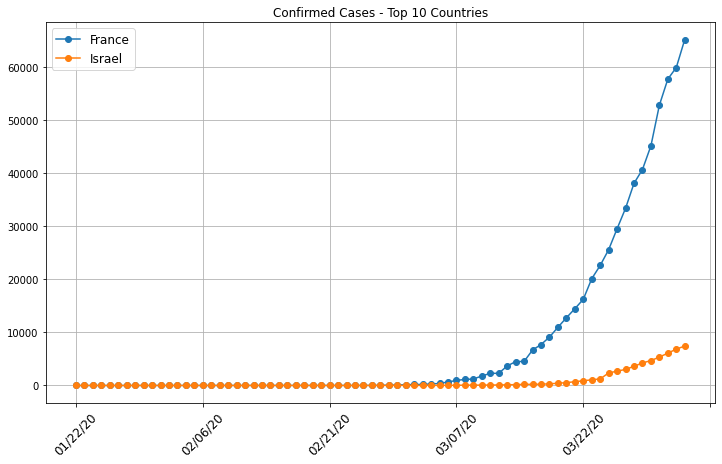

In [0]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(confirm_w, marker='o')
plt.title('Confirmed Cases - Top 10 Countries')
ax.legend(confirm_w.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.xticks(rotation=45, fontsize=12)
ax.grid(True)
plt.show()